<a href="https://colab.research.google.com/github/insoucyant/Learn_Python/blob/master/LeetCodeGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph

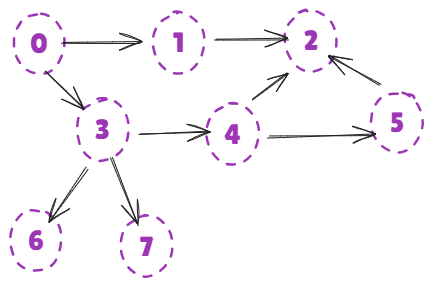

In [2]:
# Array of Edges
n = 8
edges = [[0,1],[0,3],[1,2],[3,4],[4,5],[3,6],[3,7]]

In [4]:
# Convert array of edges --> Adjaceny Matrix
M = [[0 for i in range(n)] for j in range(n)]
for u,v in edges:
  M[u][v] = 1
  # M[v][u] = 1 # For undirected Graph
M

[[0, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 1],
 [0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0]]

In [6]:
# Convert Array of Edges to --> Adjacency List
from collections import defaultdict
D = defaultdict(list)
for u,v in edges:
  D[u].append(v)
  #D[v].append(u) # For undirected graph
D

defaultdict(list, {0: [1, 3], 1: [2], 3: [4, 6, 7], 4: [5]})

# DFS with Recursion
O(V+E) <br>
Depth from east

In [9]:
def dfs_recursive(node):
  print(node)
  for nei_node in D[node]:
    if nei_node not in seen: # nei_node is Neighbor Node
      seen.add(nei_node)
      dfs_recursive(nei_node)

source = 0
seen = set()
seen.add(source)
dfs_recursive(source)

0
1
2
3
4
5
6
7


# Iterative DFS with stack
O(V+E)

In [10]:
source = 0
seen = set()
seen.add(source)
stack = [source]

while stack:
  node = stack.pop()
  print(node)
  for nei_node in D[node]:
    if nei_node not in seen:
      seen.add(nei_node)
      stack.append(nei_node)


0
3
7
6
4
5
1
2


# BFS(Queue)
O(V+E)

In [11]:
from collections import deque
source = 0
seen = set()
seen.add(source)
queue = deque([source])

while queue:
  node = queue.popleft()
  print(node)
  for nei_node in D[node]:
    if nei_node not in seen:
      seen.add(nei_node)
      queue.append(nei_node)


0
1
3
2
4
6
7
5


# 1971 Find if Path exists in a Graph
There is a bi-directional graph with n vertices, where each vertex is labeled from 0 to n - 1 (inclusive). The edges in the graph are represented as a 2D integer array edges, where each edges[i] = [ui, vi] denotes a bi-directional edge between vertex ui and vertex vi. Every vertex pair is connected by at most one edge, and no vertex has an edge to itself.

You want to determine if there is a valid path that exists from vertex source to vertex destination.

Given edges and the integers n, source, and destination, return true if there is a valid path from source to destination, or false otherwise.


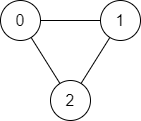




Input: n = 3, edges = [[0,1],[1,2],[2,0]], source = 0, destination = 2 <br>
Output: true <br>
Explanation: There are two paths from vertex 0 to vertex 2: <br>
- 0 → 1 → 2 <br>
- 0 → 2 <br>

In [ ]:
from collections import deque, defaultdict
def validPath(n: int, edges: list[list[int]], source: int, destination: int) -> bool:
  if source == destination:
    return True
  graph = defaultdict(list)
  for u,v in edges:
    graph[u].append(v)
    graph[v].append(u)

  seen = set()
  seen.add(source)
  q = deque()
  q.append(source)
  while q:
    node = q.popleft()
    if node == destination:
      return True
    for nei in graph[node]:
      if nei not in seen:
        seen.add(nei)
        q.append(nei)

  return False
print(validPath(3, [[0,1],[1,2],[2,0]], 0, 2))
validPath(6, [[0,1],[0,2],[3,5],[5,4],[4,3]], 0, 5)

True


False

# 695 Max Area of Island
You are given an m x n binary matrix grid. An island is a group of 1's (representing land) connected 4-directionally (horizontal or vertical.) You may assume all four edges of the grid are surrounded by water.

The area of an island is the number of cells with a value 1 in the island.

Return the maximum area of an island in grid. If there is no island, return 0.



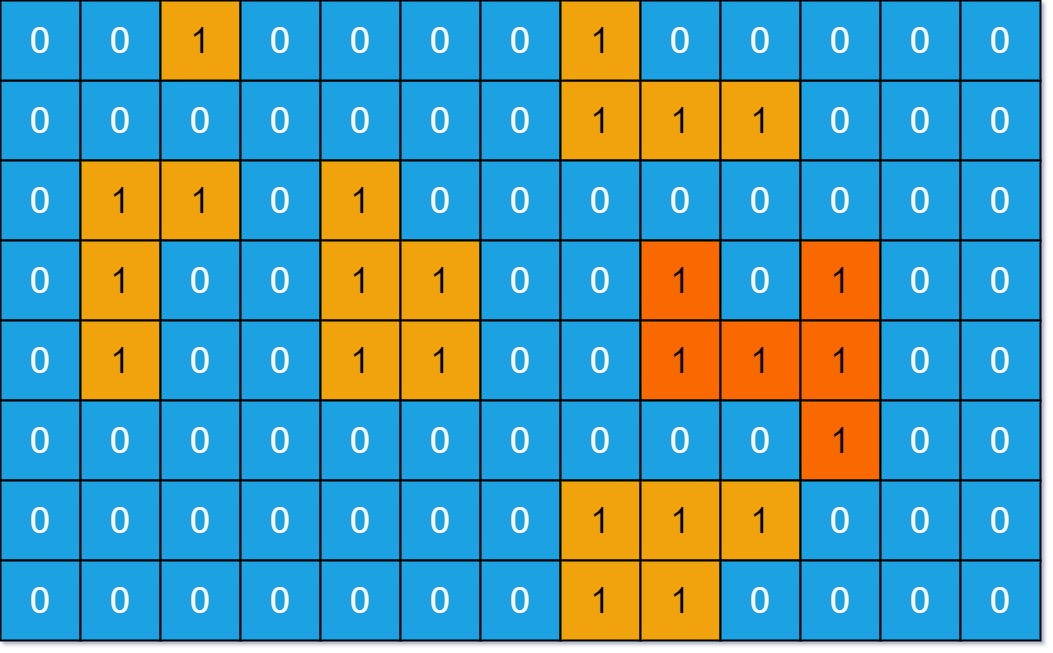



Input: grid = [  <br>
  [0,0,1,0,0,0,0,1,0,0,0,0,0], <br>
  [0,0,0,0,0,0,0,1,1,1,0,0,0], <br>
  [0,1,1,0,1,0,0,0,0,0,0,0,0], <br>
  [0,1,0,0,1,1,0,0,1,0,1,0,0], <br>
  [0,1,0,0,1,1,0,0,1,1,1,0,0], <br>
  [0,0,0,0,0,0,0,0,0,0,1,0,0], <br>
  [0,0,0,0,0,0,0,1,1,1,0,0,0], <br>
  [0,0,0,0,0,0,0,1,1,0,0,0,0] <br>
  ] <br>
Output: 6



In [ ]:
def maxAreaOfIsland(grid: list[list[int]]) -> int:
  m,n = len(grid), len(grid[0]) # m: Number of rows, i. Vertical n: Number of columns, j. Horizontal
  def dfs(i,j):
    if i < 0 or i >= m or j < 0 or j >= n or grid[i][j] != 1:
      return 0
    else:
      grid[i][j] = 0
      return 1 + dfs(i-1,j) + dfs(i+1,j) + dfs(i,j-1) + dfs(i,j+1)

  max_area = 0
  for i in range(m):
    for j in range(n):
      if grid[i][j] == 1:
        max_area = max(max_area, dfs(i,j))
  return max_area



grid = [
[0,0,1,0,0,0,0,1,0,0,0,0,0],
[0,0,0,0,0,0,0,1,1,1,0,0,0],
[0,1,1,0,1,0,0,0,0,0,0,0,0],
[0,1,0,0,1,1,0,0,1,0,1,0,0],
[0,1,0,0,1,1,0,0,1,1,1,0,0],
[0,0,0,0,0,0,0,0,0,0,1,0,0],
[0,0,0,0,0,0,0,1,1,1,0,0,0],
[0,0,0,0,0,0,0,1,1,0,0,0,0]
]


maxAreaOfIsland(grid)

6

# 200. Number of Islands
Given an m x n 2D binary grid grid which represents a map of '1's (land) and '0's (water), return the number of islands.

An island is surrounded by water and is formed by connecting adjacent lands horizontally or vertically. You may assume all four edges of the grid are all surrounded by water.

Example 1:

Input: grid = [ <br>
&emsp;  ["1","1","1","1","0"], <br>
&emsp;  ["1","1","0","1","0"], <br>
&emsp;  ["1","1","0","0","0"], <br>
&emsp;  ["0","0","0","0","0"] <br>
]


Output: 1

Example 2:

Input: grid = [ <br>
&emsp;  ["1","1","0","0","0"], <br>
&emsp;  ["1","1","0","0","0"], <br>
&emsp;  ["0","0","1","0","0"], <br>
&emsp;  ["0","0","0","1","1"] <br>
]


Output: 3

In [ ]:
# 1. Depth First Search # Recursive Call Stack
# 2. Iterative Stack # Iterative DFS
# 3. Breadth First Search # Queue
def numIslands(grid: list[list[str]]) -> int:
  m,n = len(grid), len(grid[0]) # m: Number of rows. n: Number of columns

  def dfs(i,j):
    if i < 0 or i >= m or j < 0 or j >= n or grid[i][j] != '1' :
      return
    else:
      grid[i][j] = '0'
      dfs(i+1,j)
      dfs(i-1,j)
      dfs(i,j+1)
      dfs(i,j-1)

  number_of_islands = 0
  for i in range(m): # Moving along the rows
    for j in range(n): # Moving along the columns
      if grid[i][j] == '1':
        number_of_islands += 1
        dfs(i,j)
  return number_of_islands

grid = [
  ["1","1","1","1","0"],
  ["1","1","0","1","0"],
  ["1","1","0","0","0"],
  ["0","0","0","0","0"]
]
print(numIslands(grid))

grid = [
  ["1","1","0","0","0"],
  ["1","1","0","0","0"],
  ["0","0","1","0","0"],
  ["0","0","0","1","1"]
]
print(numIslands(grid))

1
3


# 417 Pacific Atlnatic Water Flow
There is an m x n rectangular island that borders both the Pacific Ocean and Atlantic Ocean. The Pacific Ocean touches the island's left and top edges, and the Atlantic Ocean touches the island's right and bottom edges.

The island is partitioned into a grid of square cells. You are given an m x n integer matrix heights where heights[r][c] represents the height above sea level of the cell at coordinate (r, c).

The island receives a lot of rain, and the rain water can flow to neighboring cells directly north, south, east, and west if the neighboring cell's height is less than or equal to the current cell's height. Water can flow from any cell adjacent to an ocean into the ocean.

Return a 2D list of grid coordinates result where result[i] = [ri, ci] denotes that rain water can flow from cell (ri, ci) to both the Pacific and Atlantic oceans.








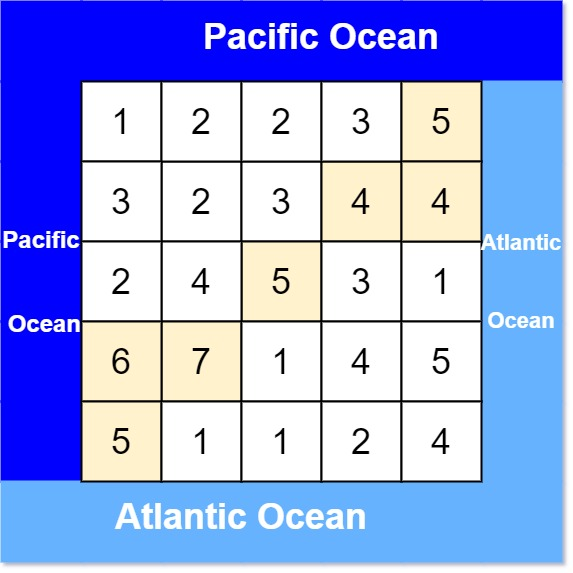



In [ ]:
from collections import deque
def pacificAtlantic(heights):
  p_que = deque()
  p_seen =set()

  a_que =deque()
  a_seen =set()

  m,n= len(heights), len(heights[0])

  for j in range(n):
    p_que.append((0,j))
    p_seen.add((0,j))

  for i in range(m):
    a_que.append((i,0))
    a_seen.add((i,0))

  def get_coords(que, seen):
    coords = set()
    while que:
      i,j = que.popleft()
      coords.add((i,j))
      for i_off, j_off in [(0,1),(0,-1),(1,0),(-1,0)]:
        row, col = i+i_off, j+j_off
        if 0<=row<m and 0<=col<n and (row,col) not in seen and heights[row][col]>=heights[i][j]:
          que.append((row,col))
          seen.add((row,col))
    return coords

  p_coords = get_coords(p_que, p_seen)
  a_coords = get_coords(a_que, a_seen)

  return list(p_coords.intersection(a_coords))

#Input:
heights = [[1,2,2,3,5],[3,2,3,4,4],[2,4,5,3,1],[6,7,1,4,5],[5,1,1,2,4]]
#Output: [[0,4],[1,3],[1,4],[2,2],[3,0],[3,1],[4,0]]
result = pacificAtlantic(heights)
print(result)

[(0, 1), (1, 2), (0, 4), (2, 1), (0, 0), (3, 1), (1, 1), (0, 3), (1, 4), (0, 2), (2, 2), (1, 0), (1, 3)]
